In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\Admin\Downloads\archive (5)\Bike sales data.xlsx')

In [19]:
data.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


# EDA and Data Cleaning

We will be using the describe function so that it provides a concise summary of various statistics, which can be very useful for initial data exploration and understanding the distribution of your data.

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_Order #,89.0,261738.067416,25.729713,261695.0,261716.00,261738.0,261760.0,261782.0
Day,88.0,13.534091,6.391353,1.0,8.75,13.5,19.0,24.0
Year,89.0,2021.000000,0.000000,2021.0,2021.00,2021.0,2021.0,2021.0
Customer_Age,89.0,34.202247,8.090651,17.0,30.00,35.0,38.0,63.0
Order_Quantity,88.0,2.125000,1.239322,1.0,1.00,2.0,3.0,4.0
Unit_Cost,89.0,1052.247191,440.499001,0.0,420.00,1252.0,1266.0,1912.0
Unit_Price,89.0,1940.943820,789.955743,0.0,2295.00,2295.0,2320.0,3400.0
Profit,89.0,1848.887640,1394.401162,245.0,1043.00,1054.0,2954.0,5908.0
Cost,89.0,2204.235955,1730.330926,0.0,1252.00,1266.0,3756.0,7592.0
Revenue,89.0,4043.943820,3139.758580,0.0,2295.00,2320.0,6750.0,13500.0


In [21]:
data.describe(include='object').T

,count,unique,top,freq
Month,89,2,December,88
Age_Group,88,3,Adults (35-64),47
Customer_Gender,89,2,F,50
Country,89,9,United States,30
State,89,17,California,20
Product_Category,89,1,Bikes,89
Sub_Category,89,1,Mountain Bikes,89
Product_Description,88,18,"Mountain-200 Black, 46",15


Next, we will find we have any duplicated data in the dataset and if we find such data we can drop them.

In [22]:
data[data.duplicated()]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


Next, we will be understanding the data and its datatypes so it will help us in exploration

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

Next, we will find if the dataset has null values and handle them.

In [27]:
data.dropna(subset=['Day'],inplace=True)

In [28]:
data.isnull().sum()

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

Here we can see that the Age_Group column has one null value. If we check the values in the Age_Group depends on the the Customer_Age. lets check the values in both the columns in order to solve the issue

Next, We can see that there are extra spaces in front of 4 columns(Unit_Cost,Unit_Price,Profit,Cost). We will be removing these extra spaces.

In [29]:
data.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [30]:
# Remove extra spaces from column names

data.columns = data.columns.str.strip()

In [31]:
data.Age_Group.unique()

array(['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)', nan],
      dtype=object)

In [32]:
group_age_null_index = data[data['Age_Group'].isnull()].index.tolist()

In [33]:
for index in group_age_null_index: 
    if (data['Customer_Age'].loc[index] <25 ):
        data['Age_Group'].loc[index]  = 'Youth'
    elif 25<=data['Customer_Age'].loc[index]<=34:
        data['Age_Group'].loc[index]  = 'Young Adults'
    elif 35<=data['Customer_Age'].loc[index]<=64 : 
        data['Age_Group'].loc[index] = 'Adults (35-64)'

C:\Users\Admin\AppData\Local\Temp\ipykernel_4832\3145823666.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'].loc[index] = 'Adults (35-64)'


In [34]:
data.Age_Group.isnull().sum()

0

In [35]:
data.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


Next, we will be dopping the unwanted columns.

In [36]:
data = data.drop(columns = ['Product_Category','Sub_Category'])

In [37]:
data.head(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320


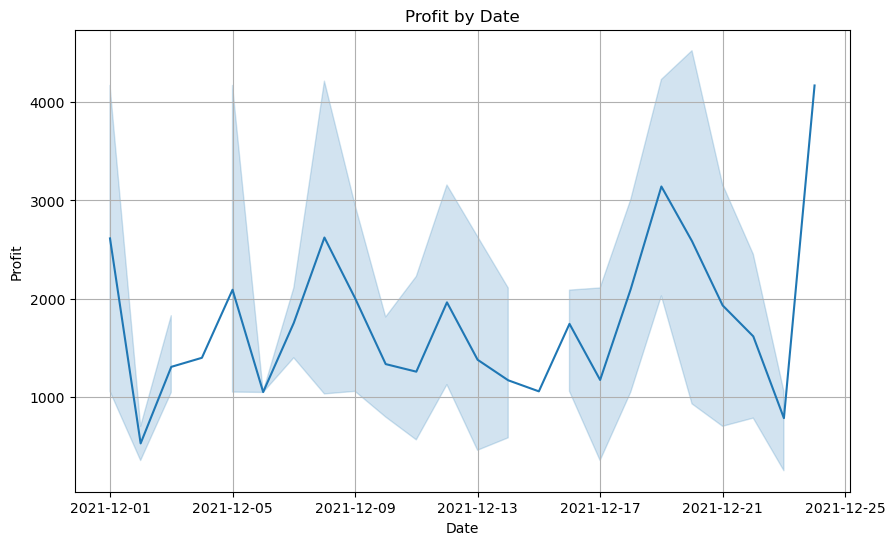

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Profit')

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit by Date')
plt.grid(True)

plt.show()

In [39]:
diff_age_groups = data.Age_Group.value_counts()

Text(0, 0.5, 'Age group')

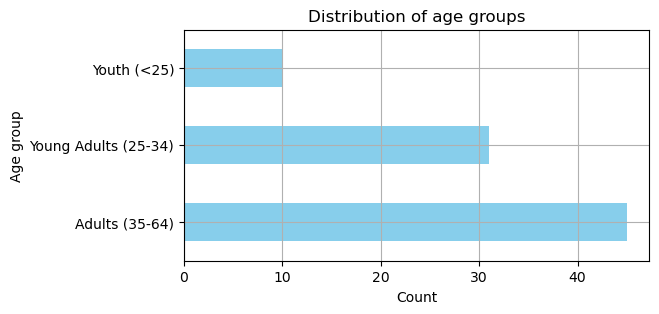

In [40]:
plt.figure(figsize=(6,3))
diff_age_groups.plot(kind='barh',color='skyblue', grid = True)
plt.title('Distribution of age groups')
plt.xlabel('Count')
plt.ylabel('Age group')

Next, Lets find out the coorelation between the age and the profits by customer genders

In [47]:
data.head(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320


<Figure size 1000x600 with 0 Axes>

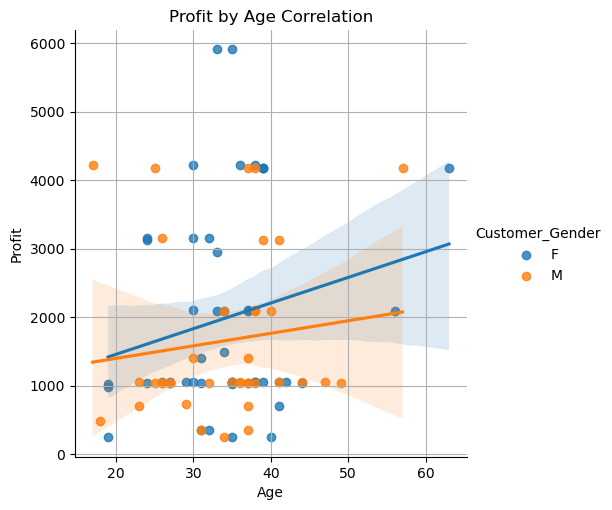

In [46]:
plt.figure(figsize=(10, 6))

sns.lmplot(data =data, x='Customer_Age', y='Profit', hue='Customer_Gender')
plt.grid(True)

plt.title('Profit by Age Correlation')
plt.xlabel('Age')
plt.ylabel('Profit')
plt.show()

Next, Lets find out the top 5 models sold

In [48]:
data.head(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320


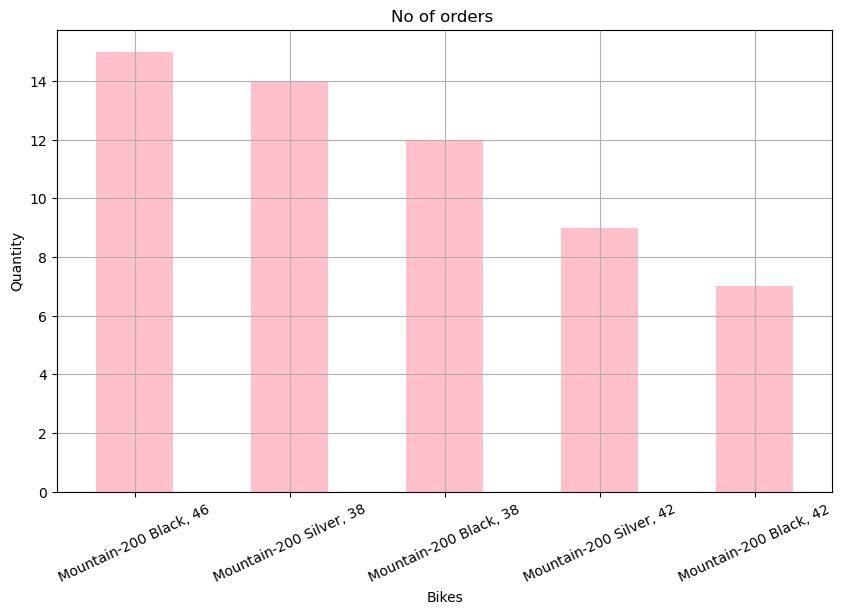

In [65]:
data['Product_Description'].value_counts().head().plot(kind='bar', figsize=(10,6),grid=True,color='pink')

plt.title('No of orders ')
plt.xlabel('Bikes')
plt.ylabel('Quantity')
plt.xticks(rotation=25)
plt.show()

Finally, the Heatmap correlation for the important columns in the data to find more insights on unit costs and profitability

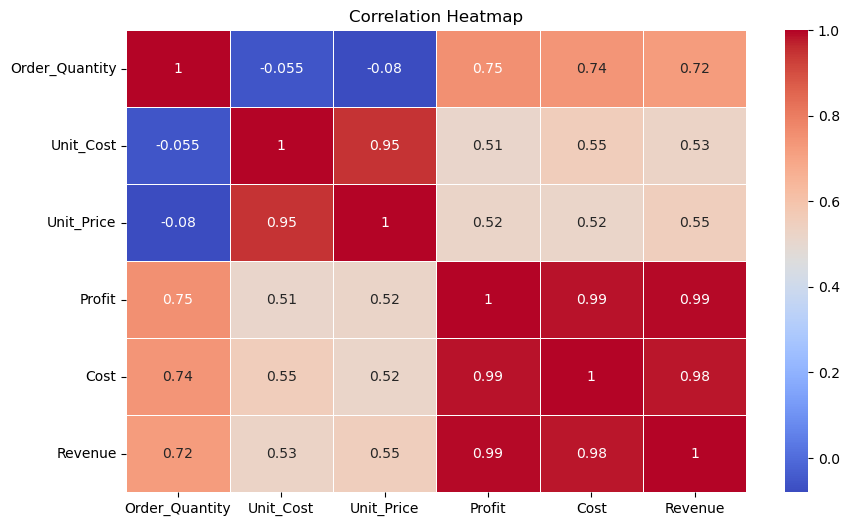

In [69]:
selected_columns = ['Order_Quantity','Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
heatmap_data = data[selected_columns]

plt.figure(figsize=(10,6))
sns.heatmap(data=heatmap_data.corr(), annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()